In [2]:
# import and read excel file
import pandas as pd
df=pd.read_excel('/Users/wendy/DA Coach/Rehab Referral Case-Insights Career.xlsx',sheet_name='data')
print('data has been successfully imported')

data has been successfully imported


In [1331]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import matplotlib.transforms as transforms

# Medibank Data Visulisation

## The goal of this project:

* Explore factors may affect total benefit payable
* Collaborative decision making - Hospital Group

## Outline:

### Part1 Factors may affect total benefit payable

* ICU days
* LOS (length of stay) 
* complex flag 
* HAC flag
* Readmission within 28 days flag
* claim separation type
* rehab length of stay
* gender
* location, state
* age
* procedure group (knee or hip replacement)
* DRG
* hospital group

### Part2 Factors need to be considered when collabrating with hospital group

* popularity 
* location 
* charge 
* LOS (length of stay) 
* rate of HACs 
* fim score improvement 
* Rehabilitation:<br>
-in-hospital rehab rate<br>
(factors may affect in-hospital rehab rate):<br>
1.gender<br>
2.state<br>
3.HAC<br>
4.procedure group<br>
5.DRG<br>
6.patient complexity<br>
-charge<br>
-rehab results：fim score<br>
-average rehab length of stays<br>

### Part3 Factors may affect patients
* expnese out of pocket
* waiting days for rehab

## EDA:

### Part1 Factors may affect total benefit paid


#### Correlation between total benefit paid and other attributes:
* Use df.corr to find the pairwise correlation between total benefit paid and other attributes.
* This funcion ignores non-numeric data type columns, therefore we need to consider those attributes as well.

In [782]:
df.corr()['totfundhospmedbenefitamt'][:].sort_values(ascending=False)

totfundhospmedbenefitamt    1.000000
clmicudays                  0.463483
episode28d_chg              0.444966
clmlosdays                  0.394535
flg_complex                 0.285380
rehab_HospExProsBen         0.133151
rehab_ClmLOSDays            0.120383
hacofadj1_flg               0.093233
rehab_xfer_flg              0.083372
ClmSeprtType                0.078267
rehab_ClmSeprtType          0.068345
mbrage                      0.042867
r28_flg                     0.032190
clmseprtid                 -0.009988
rehab_clmseprtid           -0.011200
medicoutofpktamt           -0.022993
totcogadmitfim             -0.038851
totcogdischargefim         -0.043076
rehab_days2readmit         -0.057086
totdischargefim            -0.075552
totmotordischargefim       -0.085028
totadmitfim                -0.088759
dischrghm_flg              -0.090289
totmotoradmitfim           -0.099596
Name: totfundhospmedbenefitamt, dtype: float64

#### Factors need to be explored based on above result
* clmicudays
* clmlosdays 
* flg_complex 
* hacofadj1_flg
* ClmSeprtType 
* rehab_ClmLOSDays

In [1326]:
#define average total benefit in terms of different factors
def ToBenPaid(factor):
    #1. get average total benefit paid, group by factor
    ToBenPaid=df.groupby([factor],as_index=False).agg({'totfundhospmedbenefitamt':'mean'}).rename(columns={'totfundhospmedbenefitamt':'Average total benefit paid'})
    
    #2. sort the new data by average total benefit payable descending
    ToBenPaid=ToBenPaid.sort_values(['Average total benefit paid'],ascending=False)
    
    return ToBenPaid

## Define barplot of total benefit payable and variable(factor)

In [722]:
#plot average total benefit paid by company charts
def PlotTotalBenefit(factor):
    #1.calculate the average total benefit paid by company, group by factor
    new_data=df.groupby([factor],as_index=False).agg({'totfundhospmedbenefitamt':'mean'}).rename(columns={'totfundhospmedbenefitamt':'Average total benefit paid'})
    
    #2. sort the new data by average total benefit paid descending
    new_data=new_data.sort_values(['Average total benefit paid'],ascending=False)

    #3. plot the graph
    sns.barplot(x=factor,y='Average total benefit paid',data=new_data)
    
    plt.show()
    return new_data

### ICU Days

Text(-14.950000000000003, 0.5, 'Total benefit payable')

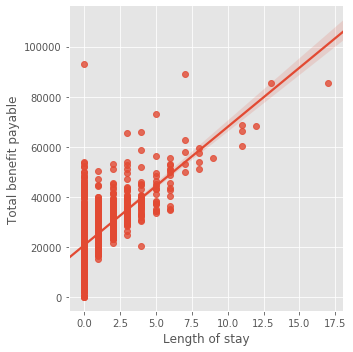

In [719]:
g = sns.lmplot(x='clmicudays', y='totfundhospmedbenefitamt',data=df)
plt.xlabel('Length of stay')
plt.ylabel('Total benefit payable')

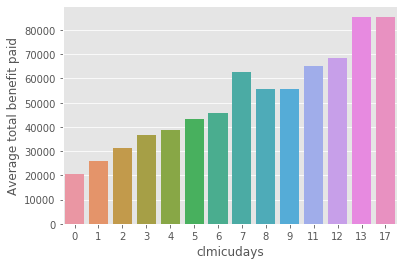

,clmicudays,Average total benefit paid
13,17,85494.550000
12,13,85399.550000
11,12,68402.300000
10,11,65239.896667
7,7,62567.014000
8,8,55623.115000
9,9,55562.550000
6,6,45808.273571
5,5,43354.661111
4,4,38856.137500


In [1327]:
PlotTotalBenefit(factor='clmicudays')

##### ICU admission rate

In [1328]:
ICU_rate=df[df['clmicudays'] != 0].clmicudays.count()/df.clmicudays.count()
print('ICU admission rate is only','{:.2%}'.format(ICU_rate))

ICU admission rate is only 3.25%


### insights for ICU days (✗)

The longer the patient stays in ICU the higher total benefit needs to be paid.<br>
However, the ICU admission rate of this dataset is only 3.25%. It is not easy to predict whether and how many days patient will stay in ICU.<br>
This factor will not be taken into consideration.

### Length of stay

Text(-14.950000000000003, 0.5, 'Total benefit payable')

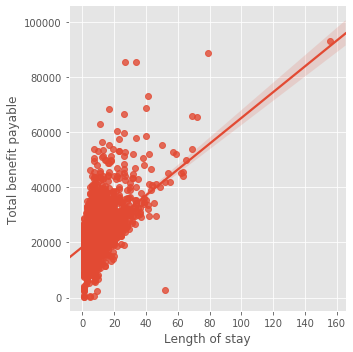

In [700]:
losplot = sns.lmplot(x='clmlosdays', y='totfundhospmedbenefitamt',data=df)
plt.xlabel('Length of stay')
plt.ylabel('Total benefit payable')

Text(0, 0.5, 'Length of stay')

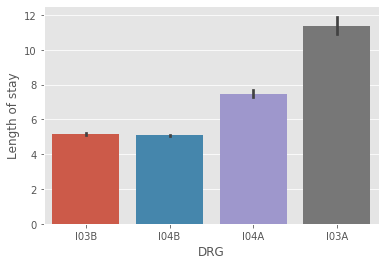

In [1318]:
losplot = sns.barplot(x='drggrpv6x', y='clmlosdays',
                    data=df)
plt.xlabel('DRG')
plt.ylabel('Length of stay')

Text(0, 0.5, 'Length of stay')

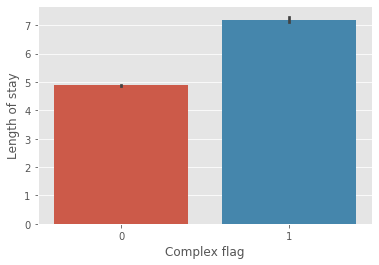

In [1375]:
losplot = sns.barplot(x='flg_complex', y='clmlosdays',
                    data=df)
plt.xlabel('Complex flag')
plt.ylabel('Length of stay')

Longer LOS, better result?

Text(0.5, 1, 'FIM score change in regard of LOS')

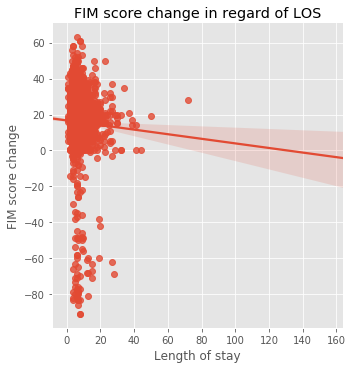

In [1378]:
# Plot lmplot 
df['fimchange']=(df.totdischargefim-df.totadmitfim)
LOSResultplot = sns.lmplot(x='clmlosdays', y='fimchange',data=df)
plt.xlabel('Length of stay')
plt.ylabel('FIM score change')
plt.title('FIM score change in regard of LOS')

### insights for length of stay (*)

This is a crucial factor that affect the total benefit paid by insurance company.<br>
However we can see from the lmplot that longer LOS does not mean better outcome.<br>

### Rehab length of stay

Text(-8.700000000000003, 0.5, 'Total benefit payable')

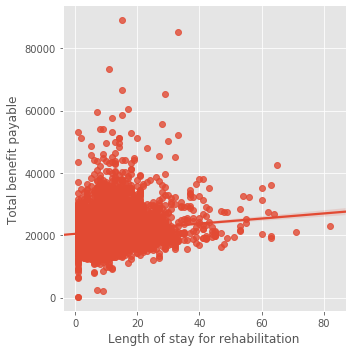

In [1322]:
rlosplot = sns.lmplot(x='rehab_ClmLOSDays', y='totfundhospmedbenefitamt',data=df)
plt.xlabel('Length of stay for rehabilitation')
plt.ylabel('Total benefit payable')

Text(0.5, 1, 'FIM score change in regard of LOS for rehabilitation')

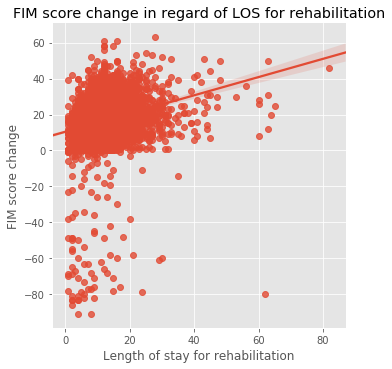

In [1379]:
df['fimchange']=(df.totdischargefim-df.totadmitfim)
RLOSResultplot = sns.lmplot(x='rehab_ClmLOSDays', y='fimchange',data=df)
plt.xlabel('Length of stay for rehabilitation')
plt.ylabel('FIM score change')
plt.title('FIM score change in regard of LOS for rehabilitation')

### Complexity Flag

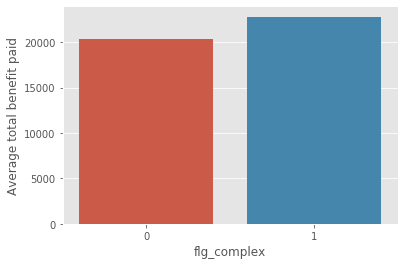

,flg_complex,Average total benefit paid
1,1,22800.358996
0,0,20327.416788


In [677]:
PlotTotalBenefit(factor='flg_complex')

### insights for complexity flag (✔)

This factor can be used when we make decision re which hospital group to collaborate with in part 2.<br>

### Hospital Acquired Complication Flag

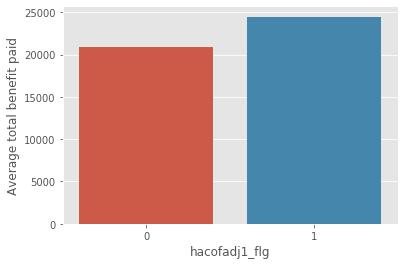

,hacofadj1_flg,Average total benefit paid
1,1,24477.567425
0,0,20950.072421


In [678]:
PlotTotalBenefit(factor='hacofadj1_flg')

### insights for Hospital Acquired Complication Flag (✔)
Fewer HACs, which is a better outcome for the patient and organisation.<br>
Same as complexity flag.

### Claim Separation Type

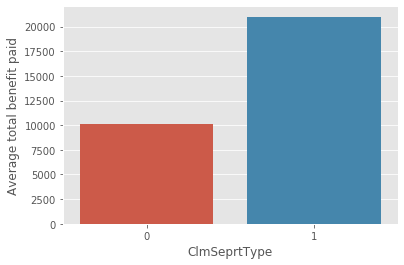

,ClmSeprtType,Average total benefit paid
1,1,20994.888189
0,0,10100.287037


In [679]:
PlotTotalBenefit(factor='ClmSeprtType')

In [163]:
df.groupby('ClmSeprtType',as_index=False).agg({'totfundhospmedbenefitamt':'mean','clmseprtid':'count'})

,ClmSeprtType,totfundhospmedbenefitamt,clmseprtid
0,0,10100.287037,27
1,1,20994.888189,35581


### insights for Claim Separation Type (✗)
* Total benefit payable for those patients who discharged on the same day are way lower.
* However only 27(out of 35,608) patients discharged on the same day.
* Instead of separation type, we need to explore more about length of stay.

### Explore more non-numeric factors
* gender
* age
* location(state)
* procedure group (knee or hip replacement)
* DRG
* hospital group

### Gender

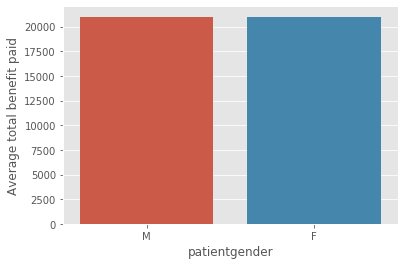

,patientgender,Average total benefit paid
1,M,21003.552434
0,F,20973.661022


In [682]:
PlotTotalBenefit(factor='patientgender')

### insights for gender factor (✗)
###### Is gender of patients a factor affect the total benefit paid by company?

No,average total benefit paid between female and male are similar.

### Age

Text(0.5, 1.0, 'Age distribution by gender')

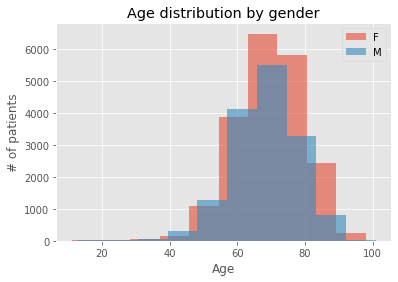

In [685]:
# Plot patient age distribution
# Group age by gender
age = df.groupby('patientgender').mbrage 
# Plot historgram for age distribution
age.plot(kind='hist', alpha=.6, legend=True) # alpha for transparency   
plt.xlabel('Age')
plt.ylabel('# of patients')
plt.title('Age distribution by gender')

In [150]:
age.describe()

,count,mean,std,min,25%,50%,75%,max
patientgender,,,,,,,,
F,20162.0,69.421486,9.841137,11.0,63.0,70.0,76.0,98.0
M,15446.0,68.227891,9.791606,13.0,62.0,68.5,75.0,101.0


Most of the patients are in the age group from 60 to 80 from above infromation.<br>
Therefore we divided all the patients into 4 age groups:

In [1324]:
age_group = pd.cut(df['mbrage'], bins=[0,60,70,80,np.inf])
age_gender_group=df.groupby([age_group]).agg({'totfundhospmedbenefitamt':'mean'}).rename(columns={'totfundhospmedbenefitamt':'Average total benefit paid'}).sort_values('Average total benefit paid',ascending=False)
age_gender_group

,Average total benefit paid
mbrage,
"(80.0, inf]",21906.591457
"(0.0, 60.0]",21082.837621
"(70.0, 80.0]",20933.480813
"(60.0, 70.0]",20690.519019


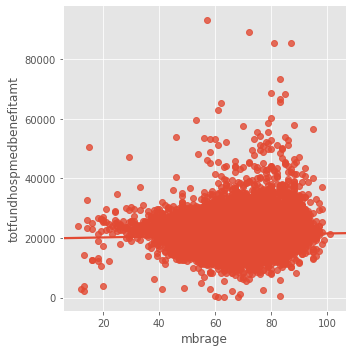

In [1274]:
sns.lmplot(x='mbrage', y='totfundhospmedbenefitamt',data=df)

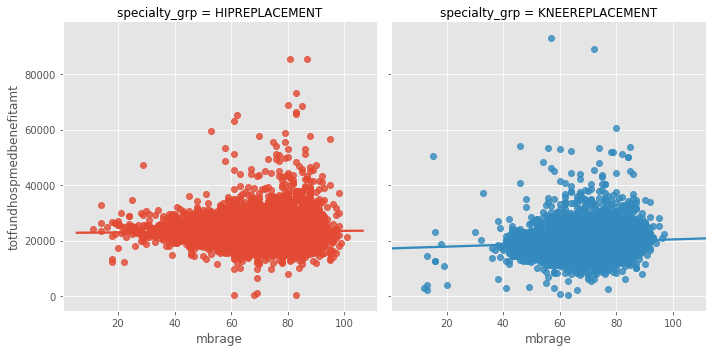

In [751]:
g = sns.lmplot(x='mbrage', y='totfundhospmedbenefitamt',hue='specialty_grp',col='specialty_grp',data=df)

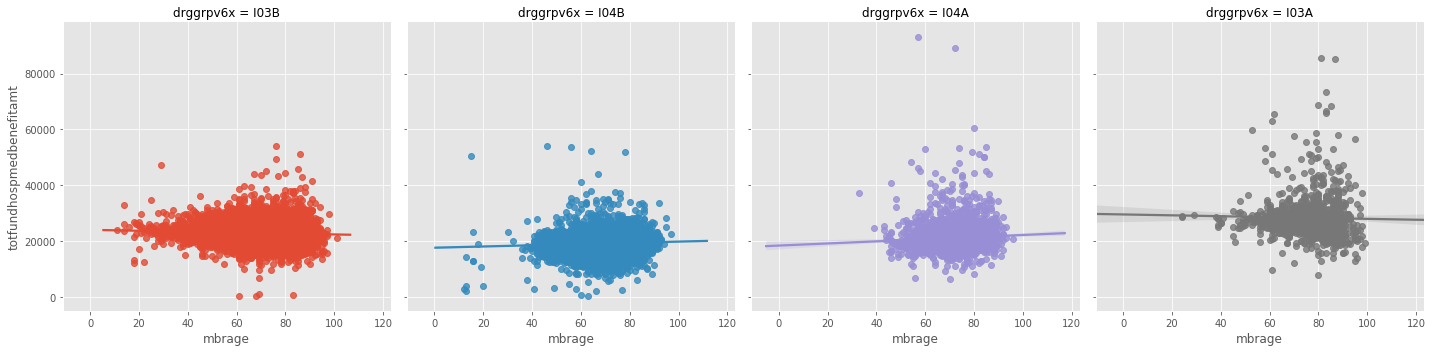

In [749]:
import seaborn as sns
# sns.set_theme(color_codes=True)

# plt.scatter(x='clmlosdays',y='totfundhospmedbenefitamt',data=df)

g = sns.lmplot(x='mbrage', y='totfundhospmedbenefitamt',hue='drggrpv6x',col='drggrpv6x',data=df)

### insights for age factor (✔)

-Age distribution by gender showing that most of our customers are from age group 60 to 80.<br> 
-Age group over 80 got highest average total benefit payable.<br> 

In regard of this, the premiums charged to different customers in different age groups should be varied. Especially for those customers over 80 years old.


### Location (state)

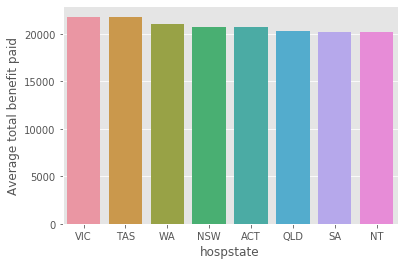

In [1277]:
t=PlotTotalBenefit('hospstate')

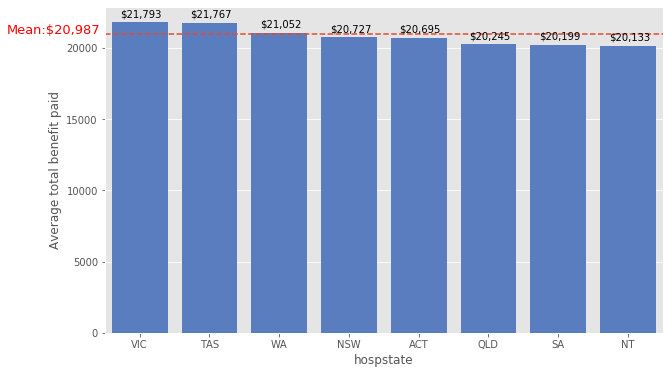

,hospstate,Average total benefit paid
6,VIC,21793.308629
5,TAS,21767.577915
7,WA,21052.178911
1,NSW,20727.672775
0,ACT,20695.918442
3,QLD,20245.372547
4,SA,20199.232918
2,NT,20133.750615


In [1312]:
test1=df.groupby('hospstate',as_index=False).agg({'totfundhospmedbenefitamt':'mean'}).rename(columns={'totfundhospmedbenefitamt':'Average total benefit paid'})
test1=test1.sort_values(['Average total benefit paid'],ascending=False)
plt.figure(figsize=(10, 6))
testbar=sns.barplot(x='hospstate',y='Average total benefit paid',data=test1,color='b')


# Add label value
for p in testbar.patches: 
    testbar.annotate('${:,.0f}'.format(int(p.get_height())), (p.get_x()+p.get_width()/6.5, p.get_height()+400)) 


# for bar in testbar:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/6.8, yval+40, 
#              '${:.,0f}'.format(yval), va='bottom') #va: vertical alignment y positional argument 
    
# Add average line
meantest=df.totfundhospmedbenefitamt.mean()
plt.axhline(meantest,linestyle='dashed')
plt.text(-1.9, meantest, 'Mean:'+'${:0,.0f}'.format(meantest), fontsize=13, color='red')
plt.show()
test1

### insights for location factor(✔)

* Premiums for customers from VIC, TAS and WA should be considered higher than customers from other states.

### Procedure Group (Knee or Hip Replacement)

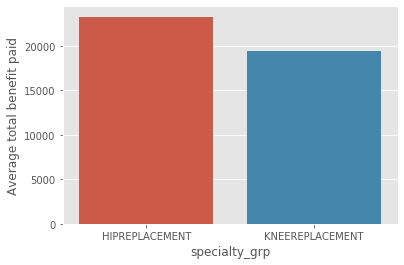

,specialty_grp,Average total benefit paid
0,HIPREPLACEMENT,23270.138737
1,KNEEREPLACEMENT,19398.910603


In [754]:
PlotTotalBenefit('specialty_grp')

### DRG

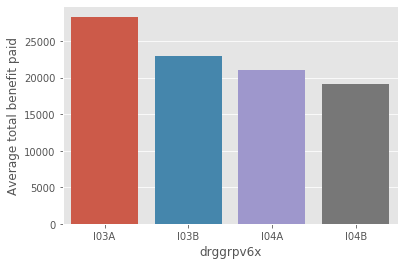

,drggrpv6x,Average total benefit paid
0,I03A,28329.007635
1,I03B,22897.473935
2,I04A,21091.895100
3,I04B,19115.711574


In [764]:
PlotTotalBenefit('drggrpv6x')

### insights for procedure group & DRG(✔)

* Average total benefit payable of hip replacement is higher than knee replacement.<br>
* For both hip and knee replacement,average total benefit payable is higher if the DRG end with split indicator A.<br>

## End of Part1

## Part2 Collaborative decision making - Hospital Group

#### Factors need to be considered when collabrating with hospital group
* popularity 
* location 
* charge 
* LOS (length of stay) 
* rate of HACs 
* fim score improvement 
* Rehabilitation:<br>
-in-hospital rehab rate<br>
(factors may affect in-hospital rehab rate):<br>
1.gender<br>
2.state<br>
3.HAC<br>
4.procedure group<br>
5.DRG<br>
6.patient complexity<br>
-charge<br>
-rehab results：fim score<br>
-average rehab length of stays<br>

### Popularity 
#### Hospital group
* plot pie chart to depict the distribution of patients for all hospital groups 
* get top 5 hospital groups detail

##### Pie chart of patients for all hospital groups 

Text(0.5, 1.0, 'Distribution of patients for hospital groups')

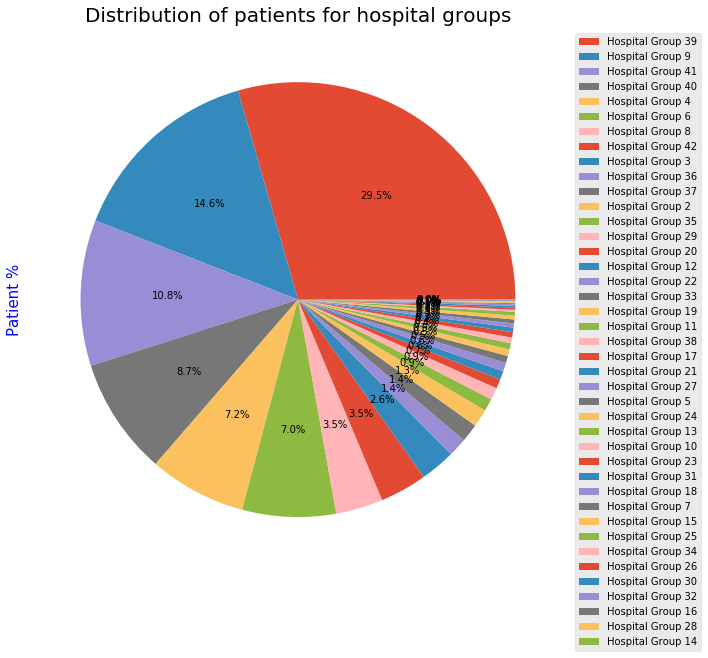

In [1330]:
patientp=df.groupby(['hospgrp']).sum().sort_values('clmseprtid',ascending=False)
plt.style.use('ggplot')
ax = patientp.plot(kind='pie',figsize=(15,10), y='clmseprtid',autopct='%1.1f%%',labels=None, legend=True)
ax.get_legend().set_bbox_to_anchor((1, 1))
ax.set_ylabel('Patient %',fontsize=15,color="blue")
ax.set_title('Distribution of patients for hospital groups',fontsize=20)

##### Top 5 popular hospital groups

In [1243]:
#Create new data to get percentage of patients for each hospital group
PatientPercent=df.groupby('hospgrp',as_index=False).agg({'clmseprtid':'count'}).rename(columns={'clmseprtid':'total_patients'})
PatientPercent['patpercent']=(PatientPercent.total_patients/(df.shape[0]-1))

# Sort the results by percentage descending 
# Show top 5 hospital groups that serve most of the patients
PatientPercent=PatientPercent.sort_values(['patpercent'],ascending=False)[:5]

# Rename the hospital group name --> shorten the names
PatientPercent['GroupID']='GP'+PatientPercent.hospgrp.str[-2:]

PatientPercent['patpercent']=PatientPercent['patpercent'].apply('{:.2%}'.format)

PatientPercent


,hospgrp,total_patients,patpercent,GroupID
31,Hospital Group 39,10485,29.45%,GP39
40,Hospital Group 9,5209,14.63%,GP 9
34,Hospital Group 41,3874,10.88%,GP41
33,Hospital Group 40,3101,8.71%,GP40
32,Hospital Group 4,2577,7.24%,GP 4


### Insights - popularity (*)
Hospital Group 39 is the most popular hospital gorup, served almost 30% of total patients in this dataset.<br>
Followed by Hospital Group 9 and 41, which are 14.63% and 10.88% respectively.<br>
Above table showed us top 5 popular hospital groups.<br>

*Hospital Group 39

### Location (States)
* create new data: <br>
1.count the number of states of each hospital group across Australia <br>
2.count total number of hospitals for each rehab hospital group across Australia<br>
* plot bar charts for above 2 data

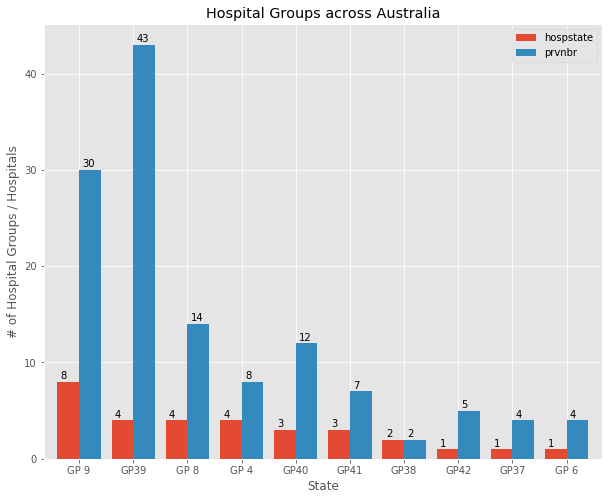

,hospgrp,hospstate,prvnbr,GroupID
40,Hospital Group 9,8,30,GP 9
31,Hospital Group 39,4,43,GP39
39,Hospital Group 8,4,14,GP 8
32,Hospital Group 4,4,8,GP 4
33,Hospital Group 40,3,12,GP40
34,Hospital Group 41,3,7,GP41
30,Hospital Group 38,2,2,GP38
35,Hospital Group 42,1,5,GP42
29,Hospital Group 37,1,4,GP37
37,Hospital Group 6,1,4,GP 6


In [1265]:
#Create new data to get # of states coverd by each hospital group & # of hospitals under each hospital group
location=df.groupby(['hospgrp'],as_index=False).agg({'hospstate':'nunique','prvnbr':'nunique'})

#sort by value and showing top 10
location=location.sort_values(['hospstate','prvnbr'],ascending=[False,False])[:10]
# Rename the hospital group name --> shorten the names
location['GroupID']='GP'+location.hospgrp.str[-2:]

# Plot bar chart
locationBar=location.plot.bar(x = 'GroupID', y = ['hospstate','prvnbr'],rot =360,figsize=(10,8),width =.8)

plt.xlabel('State')
plt.ylabel('# of Hospital Groups / Hospitals')
plt.title('Hospital Groups across Australia')
# Add annotate
for p in locationBar.patches: 
    locationBar.annotate(np.round(p.get_height()), (p.get_x()+p.get_width()/6.5, p.get_height()+.3))

plt.show()

location

In [113]:
#We already know Hospital Group 9 covers all states in Australia.
#Let's check which 4 states that Hospital Group 39,8,4 covers:
GP39States=df[(df.hospgrp=='Hospital Group 39')].hospstate.unique()
GP39States=GP39States[~pd.isnull(GP39States)]
print('Hospital Group 39:'+ f'{GP39States}')
GP8States=df[(df.hospgrp=='Hospital Group 8')].hospstate.unique()
GP8States=GP8States[~pd.isnull(GP8States)]
print('Hospital Group 8:'+ f'{GP8States}')
GP4States=df[(df.hospgrp=='Hospital Group 4')].hospstate.unique()
GP4States=GP4States[~pd.isnull(GP4States)]
print('Hospital Group 4:'+ f'{GP4States}')

Hospital Group 39:['QLD' 'WA' 'VIC' 'NSW']
Hospital Group 8:['NSW' 'VIC' 'TAS' 'QLD']
Hospital Group 4:['TAS' 'SA' 'NSW' 'ACT']


### Insights - location(*)

Compared to Hospital Group 9, Hospital Group 39 only covers 4 states across Australia.<br>

However, it serverd almost 15% more patients then group 9. The reasons might be:
* Hospital Group 39 consists of 43 hospitals while
* Hospital Group 9 consists of 30 hospitals
* The 4 states Group 39 covers are the top four states of Australia in terms of population distribution.

The decision is basically between group 9 and 39 according to popularity and location.

*Hospital Group 9 vs. Hospital Group 39

### Total Medibank benefit payable
* create new data: <br>
-to get average total benefit paid by each hospital group<br>
-showing average total benefit payalbe of top 5 popular hospital groups
* plot bar charts 

In [780]:
#Recall top 5 popular hospital group
PatientPercent

,hospgrp,clmseprtid,patpercent,GroupID
31,Hospital Group 39,10485,29.45%,GP39
40,Hospital Group 9,5209,14.63%,GP 9
34,Hospital Group 41,3874,10.88%,GP41
33,Hospital Group 40,3101,8.71%,GP40
32,Hospital Group 4,2577,7.24%,GP 4


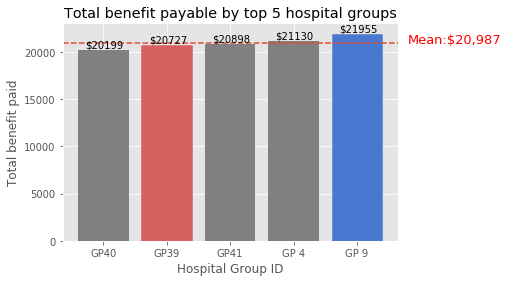

,hospgrp,Total_benefit_paid,GroupID
33,Hospital Group 40,20199.452706,GP40
31,Hospital Group 39,20727.379509,GP39
34,Hospital Group 41,20898.264073,GP41
32,Hospital Group 4,21129.581820,GP 4
40,Hospital Group 9,21954.615001,GP 9


In [1252]:
#Create new data to get average expense patients need to pay for each hospital group
TotalBenefitPaid=df.groupby('hospgrp',as_index=False).agg({'totfundhospmedbenefitamt':'mean'}).rename(columns={'totfundhospmedbenefitamt':'Total_benefit_paid'})

# Rename the hospital group name --> shorten the names
TotalBenefitPaid['GroupID']='GP'+TotalBenefitPaid.hospgrp.str[-2:]


#Showing average total benefit paid of top 5 popular hospital groups
TBPGP39=TotalBenefitPaid[TotalBenefitPaid.GroupID=='GP39']
TBPGP9=TotalBenefitPaid[TotalBenefitPaid.GroupID=='GP 9']
TBPGP41=TotalBenefitPaid[TotalBenefitPaid.GroupID=='GP41']
TBPGP40=TotalBenefitPaid[TotalBenefitPaid.GroupID=='GP40']
TBPGP4=TotalBenefitPaid[TotalBenefitPaid.GroupID=='GP 4']

# Merge the result
# Sort average total benefit paid ascending
TotalBenefitResult=TBPGP39.append([TBPGP9,TBPGP41,TBPGP40,TBPGP4]).sort_values('Total_benefit_paid',ascending=True)
x7=TotalBenefitResult.GroupID
y7=TotalBenefitResult.Total_benefit_paid

# Plot barchart based on above result
TotalBenefitBar=plt.bar(x7,y7,color='grey')
# Highlight group 39 & 9
TotalBenefitBar[1].set_color('r')
TotalBenefitBar[4].set_color('b')
plt.ylabel('Total benefit paid')
plt.xlabel('Hospital Group ID')
plt.title('Total benefit payable by top 5 hospital groups')
# Add label value
for bar in TotalBenefitBar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/6.8, yval+40, 
             '${:.0f}'.format(yval), va='bottom') #va: vertical alignment y positional argument 
    
# Add average line
totalbenefitmean = df['totfundhospmedbenefitamt'].mean()
plt.axhline(totalbenefitmean,linestyle='dashed')
plt.text(4.8, totalbenefitmean, 'Mean:'+'${:0,.0f}'.format(totalbenefitmean), fontsize=13, color='red')


plt.show()
TotalBenefitResult

### Insights - Total Medibank benefit payable(*)

In this part,the average total benefit of hospital group 39 is about $1,200 lower than hospital group 9.<br>

*Hospital Group 39

### Total benefit payable group by procedure group (group 39 vs. group 9)

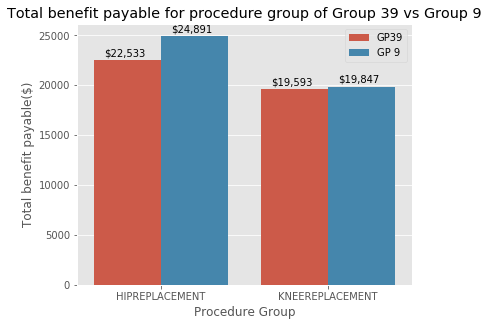

In [991]:
#Create new data to get average expense patients need to pay for each hospital group
TotalBenefitPaidProcedure=df.groupby(['hospgrp','specialty_grp'],as_index=False).agg({'totfundhospmedbenefitamt':'mean'}).rename(columns={'totfundhospmedbenefitamt':'Total_benefit_paid'})

# Rename the hospital group name --> shorten the names
TotalBenefitPaidProcedure['GroupID']='GP'+TotalBenefitPaidProcedure.hospgrp.str[-2:]

plt.figure(figsize=(6, 4.8))
ToBeProBar=sns.barplot(x='specialty_grp', y='Total_benefit_paid',hue='GroupID',hue_order=['GP39','GP 9'],data=test)
plt.xlabel('Procedure Group')
plt.ylabel('Total benefit payable($)')
plt.legend(loc='best')
plt.title('Total benefit payable for procedure group of Group 39 vs Group 9')
# Add annotate
for p in ToBeProBar.patches: 
    ToBeProBar.annotate('${:,.0f}'.format(int(p.get_height())), (p.get_x()+p.get_width()/6.5, p.get_height()+400)) 
plt.show()


### Total benefit payable group by DRG (group 39 vs. group 9)

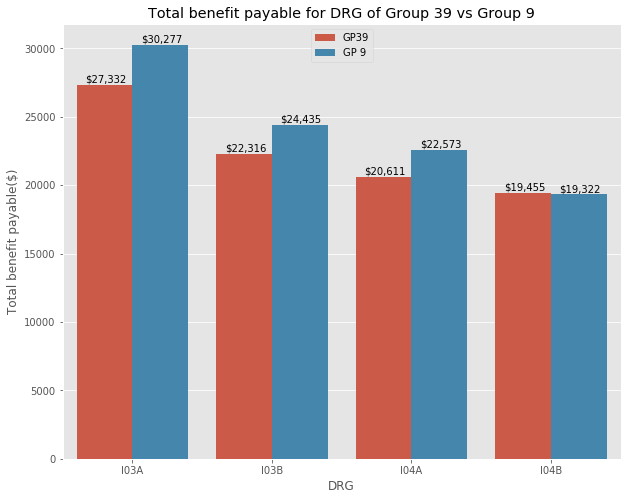

,hospgrp,drggrpv6x,Total_benefit_paid,GroupID
100,Hospital Group 39,I03A,27332.140229,GP39
135,Hospital Group 9,I03A,30277.684765,GP 9
101,Hospital Group 39,I03B,22316.735715,GP39
136,Hospital Group 9,I03B,24435.310508,GP 9
102,Hospital Group 39,I04A,20611.810979,GP39
137,Hospital Group 9,I04A,22573.585429,GP 9
138,Hospital Group 9,I04B,19322.097283,GP 9
103,Hospital Group 39,I04B,19455.744832,GP39


In [1268]:
#Create new data to get average expense patients need to pay for each hospital group
TotalBenefitPaidDRG=df.groupby(['hospgrp','drggrpv6x'],as_index=False).agg({'totfundhospmedbenefitamt':'mean'}).rename(columns={'totfundhospmedbenefitamt':'Total_benefit_paid'})

# Rename the hospital group name --> shorten the names
TotalBenefitPaidDRG['GroupID']='GP'+TotalBenefitPaidDRG.hospgrp.str[-2:]

# Showing average total benefit payable of DRG for group 39 and group 9
TBPDRGGP39=TotalBenefitPaidDRG[TotalBenefitPaidDRG.GroupID=='GP39']
TBPDRGGP9=TotalBenefitPaidDRG[TotalBenefitPaidDRG.GroupID=='GP 9']

# Merge the result
# Sort average total benefit paid ascending
TotalBenefitDRGResult=TBPDRGGP39.append(TBPDRGGP9).sort_values(['drggrpv6x','Total_benefit_paid'],ascending=[True,True])

# Plot barchart based on above result
plt.figure(figsize=(10, 8))
ToBeDRGPlot=sns.barplot(x='drggrpv6x', y='Total_benefit_paid',hue='GroupID',data=TotalBenefitDRGResult)
plt.legend(loc='upper center')
plt.xlabel('DRG')
plt.ylabel('Total benefit payable($)')
plt.title('Total benefit payable for DRG of Group 39 vs Group 9')
# Add annotate
for p in ToBeDRGPlot.patches: 
    ToBeDRGPlot.annotate('${:,.0f}'.format(int(p.get_height())), (p.get_x()+p.get_width()/6.5, p.get_height()+200)) 
    
plt.show()
TotalBenefitDRGResult


### Insights - Total Medibank benefit payable (procedure group /DRG) (*)

Strong evidences in procedure group/DRG level to prove that hospital group 39 can provide more affordable service.<br>

*Hospital Group 39

### Length of stay
* create new data: <br>
to get average days patients stay in the hospital by each hospital group<br>
* plot bar charts 

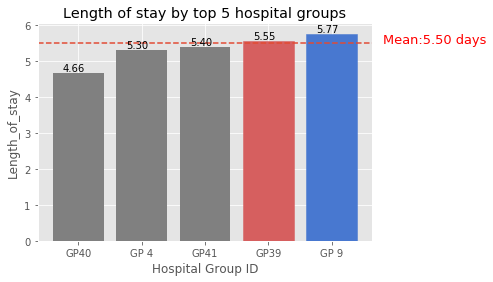

Average length of stay is 5.50 days.


,hospgrp,Length_of_stay,GroupID
33,Hospital Group 40,4.661077,GP40
32,Hospital Group 4,5.302678,GP 4
34,Hospital Group 41,5.401652,GP41
31,Hospital Group 39,5.549642,GP39
40,Hospital Group 9,5.765214,GP 9


In [926]:
#Create new data to get average expense patients need to pay for each hospital group
LengthOfStay=df.groupby('hospgrp',as_index=False).agg({'clmlosdays':'mean'}).rename(columns={'clmlosdays':'Length_of_stay'})

# Rename the hospital group name --> shorten the names
LengthOfStay['GroupID']='GP'+LengthOfStay.hospgrp.str[-2:]

# Sort average total benefit paid ascending
LengthOfStay=LengthOfStay.sort_values('Length_of_stay',ascending=True)

# Only showing average days patients stay in hospital of top 5 popular hospital groups
LOSGP39=LengthOfStay[LengthOfStay.GroupID=='GP39']
LOSGP9=LengthOfStay[LengthOfStay.GroupID=='GP 9']
LOSGP41=LengthOfStay[LengthOfStay.GroupID=='GP41']
LOSGP40=LengthOfStay[LengthOfStay.GroupID=='GP40']
LOSGP4=LengthOfStay[LengthOfStay.GroupID=='GP 4']

# Merge the result
# Sort average total benefit paid ascending
LengthOfStayResult=LOSGP39.append([LOSGP9,LOSGP41,LOSGP40,LOSGP4]).sort_values('Length_of_stay',ascending=True)

#plot barchart based on above result
x8=LengthOfStayResult.GroupID
y8=LengthOfStayResult.Length_of_stay
LOSBar=plt.bar(x8,y8,color='grey')
LOSBar[3].set_color('r')
LOSBar[4].set_color('b')
plt.xlabel('Hospital Group ID')
plt.ylabel('Length_of_stay')
plt.title('Length of stay by top 5 hospital groups')
# Add label value
for bar in LOSBar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/5, yval, 
             '{:.2f}'.format(yval), va='bottom') #va: vertical alignment y positional argument        
# add average line & mean value
losmean = df['clmlosdays'].mean()
plt.axhline(losmean,linestyle='dashed')
plt.text(4.8, losmean, 'Mean:{:0.2f}'.format(losmean)+' days', fontsize=13, color='red')

plt.show()

print('Average length of stay is','{:,.2f}'.format(losmean),'days.')
LengthOfStayResult

### Insights - length of stay(✔)

In this part,the average total length of stay of hospital group 39 a bit shorter than hospital group 9.<br>
5.5 days is similar to the average length of stay of the whole dataset.
*Hospital Group 39

### Rate of HACs of each hospital group


#### Define rate of HACs

In [1209]:
#define rate of HACs 
def CompRate(factor):
    #1. count the number of facotrs(i.e patients) in terms of surgery, group by factor
    data5=df.groupby([factor],as_index=False).agg({'clmseprtid':'count'})
    
    #2. count the number of facotrs(i.e patients) in terms of rehab, group by factor
    data6=df[df['hacofadj1_flg'] == 1].groupby([factor],as_index=False).agg({'hacofadj1_flg':'count'})

    #3. merge the data and calculate the rehab rate
    CompRate=data5.merge(data6,left_on=factor,right_on=factor,how='inner')
    CompRate['comp_rate']=(CompRate.hacofadj1_flg/CompRate.clmseprtid )
    
    return CompRate

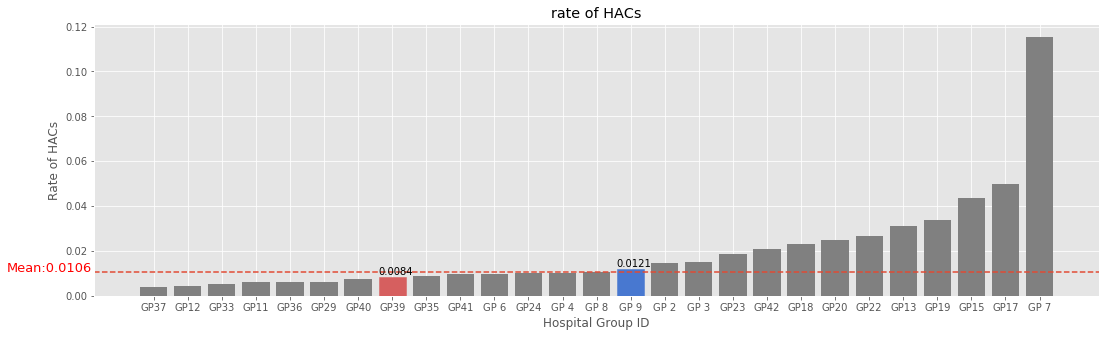

Average rate of HACs is 0.0106


,hospgrp,clmseprtid,hacofadj1_flg,comp_rate,GroupID
17,Hospital Group 37,491,2,0.004073,GP37
1,Hospital Group 12,231,1,0.004329,GP12
14,Hospital Group 33,188,1,0.005319,GP33
0,Hospital Group 11,167,1,0.005988,GP11
16,Hospital Group 36,488,3,0.006148,GP36
12,Hospital Group 29,321,2,0.006231,GP29
20,Hospital Group 40,3101,23,0.007417,GP40
18,Hospital Group 39,10485,88,0.008393,GP39
15,Hospital Group 35,332,3,0.009036,GP35
21,Hospital Group 41,3874,37,0.009551,GP41


In [1269]:
# Now we want to see rate of HACs of each hospital group

# Pass 'hospgrp' as the factor in rehab rate function
# Sort the data by rate of HACs ascending
GrpCompRate=CompRate('hospgrp').sort_values('comp_rate',ascending=True)

# Rename the hospital group name --> shorten the names
GrpCompRate['GroupID']= 'GP' + GrpCompRate.hospgrp.str[-2:]


# Plot the graph
x11=GrpCompRate.GroupID
y11=GrpCompRate.comp_rate

fig=plt.figure(figsize=(18,5))

CRBar=plt.bar(x11,y11,color='grey')

#Add value label on the top of group 39 and 9
for idx, bar in enumerate(CRBar):
    yval = bar.get_height()
    if idx == 7 or idx == 14:
        plt.text(bar.get_x() + bar.get_width()/10 - 0.1, yval, '{:.4f}'.format(yval), va='bottom') #va: vertical alignment y positional argument
        

CRBar[7].set_color('r')
CRBar[14].set_color('b')
plt.xlabel('Hospital Group ID')
plt.ylabel('Rate of HACs')
plt.title('rate of HACs')

#Add average line
HACsmean=GrpCompRate.hacofadj1_flg.sum()/GrpCompRate.clmseprtid.sum()
plt.axhline(HACsmean,linestyle='dashed')
plt.text(-4.3, HACsmean, 'Mean:{:0.4f}'.format(HACsmean), fontsize=13, color='red')
plt.show()
print('Average rate of HACs is','{:.4f}'.format(HACsmean))
GrpCompRate

### Insights - rate of HACs(✔)

Fewer HACs, which is a better outcome for the patient and organisation.<br> 
In this case, group 39 got lower rate of HACs.<br>
<br>
*Hospital Group 39

### Fim score improvement

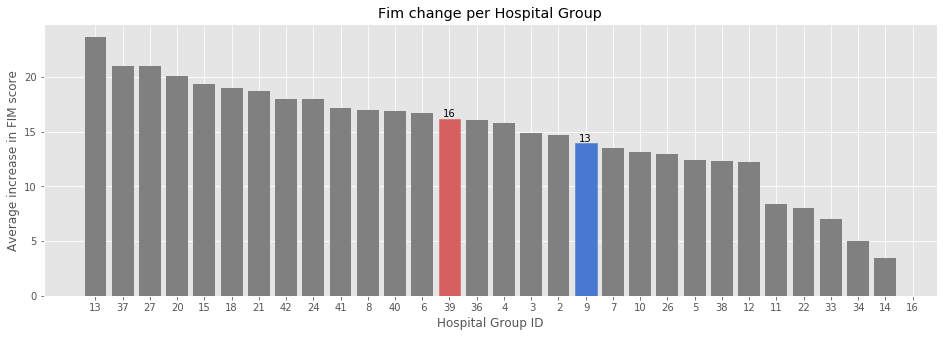

,hospgrp,totdischargefim,totadmitfim,fimchange,GroupID
3,Hospital Group 13,122.379310,98.701149,23.678161,13
29,Hospital Group 37,107.000000,86.000000,21.000000,37
18,Hospital Group 27,121.000000,100.000000,21.000000,27
11,Hospital Group 20,96.250000,76.125000,20.125000,20
5,Hospital Group 15,116.866667,97.466667,19.400000,15
8,Hospital Group 18,112.000000,93.000000,19.000000,18
12,Hospital Group 21,111.720000,93.020000,18.700000,21
35,Hospital Group 42,113.857143,95.819549,18.037594,42
15,Hospital Group 24,115.500000,97.500000,18.000000,24
34,Hospital Group 41,115.574827,98.353816,17.221011,41


In [1185]:
#Create new data to get average fim score (admission & discharge) for each rehab hospital group
disresults=df.groupby(['hospgrp'],as_index=False).agg({'totdischargefim':'mean','totadmitfim':'mean'})

#calculate the difference of average fim score between admission and discharge for each rehab hospital group
disresults['fimchange']=(disresults.totdischargefim-disresults.totadmitfim)
# .sort_values(['hospstate'],ascending=False)

#Rename the hospital group name --> shorten the names
disresults['GroupID']=disresults.hospgrp.str[-2:]

disresults=disresults.sort_values(['fimchange'],ascending=False)

#plot bar chart
#Define x and y-axies and figure size
x13=disresults.GroupID
y13=disresults.fimchange
fig=plt.figure(figsize=(16,5))

#Plot bar chart
disresultsBar=plt.bar(x13,y13,color='grey')
disresultsBar[13].set_color('r')
disresultsBar[18].set_color('b')


#Add x,y labels and title
plt.xlabel('Hospital Group ID')
plt.ylabel('Average increase in FIM score')
plt.title('Fim change per Hospital Group')


#Add value label on the top of group 39 and 9
for idx, bar in enumerate(disresultsBar):
    yval = bar.get_height()
    if idx == 13 or idx == 18:
        plt.text(bar.get_x() + bar.get_width()/5, yval, int(yval), va='bottom') #va: vertical alignment y positional argument      
        
plt.show()
disresults

In [1208]:
fimrecord=df.totmotordischargefim.count()/df.clmseprtid.count()
print('Only','{:,.2%}'.format(fimrecord),'of patients in this dataset got fim scores record.')

Only 27.20% of patients in this dataset got fim scores record.


### Insights - fim score improvement (✗)

This factor will not be taken into consideration, as there is only 27.2% of patients in this dataset got records of their fim scores.

### Rehab perspective:
* in-hospital rehab rate<br>
(factors may affect in-hospital rehab rate):<br>
1.gender<br>
2.state<br>
3.HAC<br>
4.procedure group<br>
5.DRG<br>
6.patient complexity<br>
* charge<br>
* rehab results：fim score<br>
* average rehab length of stays<br>

## In-hospital rehab rate
* define rehab rate
* show in-hospital rehab rate of top 5 popular hospital
* plot bar chart
* find out factors might affect rehab rate

### Define Rehab Rate

In [812]:
#define rehab rate
def RehabRate(factor):
    #1. count the number of facotrs(i.e patients) in terms of surgery, group by factor
    data1=df.groupby([factor],as_index=False).agg({'clmseprtid':'count'})
    
    #2. count the number of facotrs(i.e patients) in terms of rehab, group by factor
    data2=df.groupby([factor],as_index=False).agg({'rehab_clmseprtid':'count'})

    #3. merge the data and calculate the rehab rate
    RehabRate=data1.merge(data2,left_on=factor,right_on=factor,how='inner')
    RehabRate['rehab_rate']=(RehabRate.rehab_clmseprtid/RehabRate.clmseprtid )
    RehabRate=RehabRate.sort_values('rehab_rate',ascending=False)
    
    return RehabRate

In [809]:
# Recall top 5 popular hospital groups
PatientPercent

,hospgrp,clmseprtid,patpercent,GroupID
31,Hospital Group 39,10485,29.45%,GP39
40,Hospital Group 9,5209,14.63%,GP 9
34,Hospital Group 41,3874,10.88%,GP41
33,Hospital Group 40,3101,8.71%,GP40
32,Hospital Group 4,2577,7.24%,GP 4


##### Top 5 hospital groups ranked by rehab rate

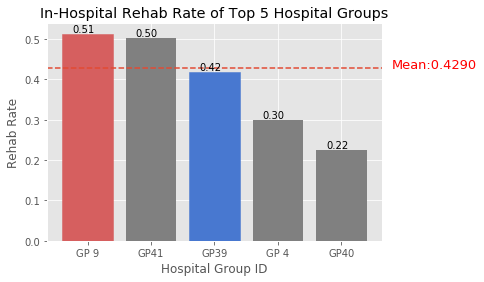

,hospgrp,clmseprtid,rehab_clmseprtid,rehab_rate,GroupID
40,Hospital Group 9,5209,2675,0.513534,GP 9
34,Hospital Group 41,3874,1945,0.502065,GP41
31,Hospital Group 39,10485,4397,0.419361,GP39
32,Hospital Group 4,2577,773,0.299961,GP 4
33,Hospital Group 40,3101,697,0.224766,GP40


In [1343]:
# Now we want to see in-hospital rehab rate of the top 5 popular hospital groups
# Based on above result, set the number of patients greater than 2576 --> clmseprtid>2576

# Pass 'hospgrp' as the factor in rehab rate function
GrpRehabRate=RehabRate('hospgrp')

# Rename the hospital group name --> shorten the names
GrpRehabRate['GroupID']='GP'+GrpRehabRate.hospgrp.str[-2:]

# Filter the data by adding certain number of patients as a condition
# Sort the data by rehab rate descending
GrpRehabRate=GrpRehabRate[GrpRehabRate.clmseprtid>2576].sort_values(['rehab_rate'],ascending=False)

# Plot the graph
x9=GrpRehabRate.GroupID
y9=GrpRehabRate.rehab_rate
GRRBar=plt.bar(x9,y9,color='grey')
GRRBar[0].set_color('r')
GRRBar[2].set_color('b')
#Add average line
RRmean=df.rehab_clmseprtid.count()/df.clmseprtid.count()
plt.axhline(RRmean,linestyle='dashed')
plt.text(4.8, RRmean, 'Mean:{:0.4f}'.format(RRmean), fontsize=13, color='red')

plt.xlabel('Hospital Group ID')
plt.ylabel('Rehab Rate')
plt.title('In-Hospital Rehab Rate of Top 5 Hospital Groups')
# Add label value
for bar in GRRBar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/5, yval, '{:.2f}'.format(yval), va='bottom') #va: vertical alignment y positional argument        

plt.show()

GrpRehabRate

###### Why showing rehab rate based on the volume of seperations?
The result doesn't make sense if we don't take volume of seperations as a factor:

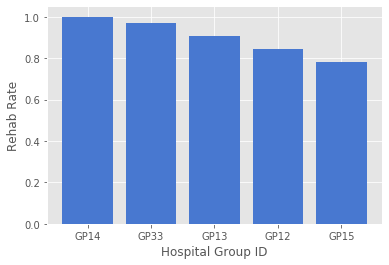

,hospgrp,clmseprtid,rehab_clmseprtid,GroupID,rehab_rate
4,Hospital Group 14,2,2,GP14,1.000000
25,Hospital Group 33,188,182,GP33,0.968085
3,Hospital Group 13,96,87,GP13,0.906250
2,Hospital Group 12,231,195,GP12,0.844156
5,Hospital Group 15,23,18,GP15,0.782609


In [422]:
# Now we want to see in-hospital rehab rate of the top 5 popular hospital groups
# Based on above result, we can set the number of patients greater than 2576 --> clmseprtid>2576

# Count the number of patients doing surgery, group by factor
data1=df.groupby(['hospgrp'],as_index=False).agg({'clmseprtid':'count'})
    
# Count the number of patients doing rehab, group by factor
data2=df.groupby(['hospgrp'],as_index=False).agg({'rehab_clmseprtid':'count'})

# Rename the hospital group name --> shorten the names
# Add GP in front of hospital group number otherwise: 
# column auto converted to integer after merge,plot auto sort by this column.
data2['GroupID']='GP'+data2.hospgrp.str[-2:]

# Merge the data and calculate the rehab rate
data3=pd.merge(data1,data2)
data3['rehab_rate']=(data3.rehab_clmseprtid/data3.clmseprtid )

# Filter the data by adding certain number of patients as a condition
# Sort the merge data by rehab rate descending
data3=data3.sort_values(['rehab_rate'],ascending=False)[:5]

#Define x and y-axies
x10=data3.GroupID
y10=data3.rehab_rate

# Plot the graph
plt.bar(x10,y10)
plt.xlabel('Hospital Group ID')
plt.ylabel('Rehab Rate')
plt.show()

data3

### Insights - In-hospital rehab rate(✔)

In-hospital rehab rate is one of the important factors that can increase the cost of total benefit payable.<br>
We can see hopsital group 39 got lower inpatient rehab rate than group 9, and slightly lower than average rehab rate as well.<br>
*Hospital Group 39<br>

Further more, to predict in-hospital rehabilitation, we need to figure out what factors that may affect in-hospital rehab rate?

We calculated the in-hospital rehab rate of top 5 popular hospital groups, the rates for group 39 and 9 are 41.94% and 51.35% respectively. Now we need to find out what factors might affect rehab rate:
1. gender
2. age
3. state
4. HAC
5. procedure group
6. DRG
7. patient complexity

### 1.gender

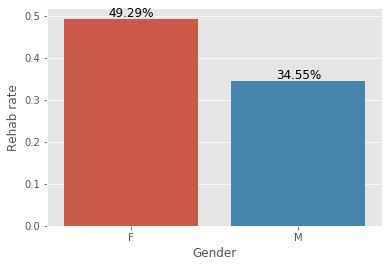

,patientgender,clmseprtid,rehab_clmseprtid,rehab_rate
0,F,20162,9938,0.492907
1,M,15446,5337,0.345526


In [1032]:
RRGender=RehabRate(factor='patientgender')

RRGenderBar=sns.barplot(x='patientgender',y='rehab_rate',data=RRGender) 
plt.xlabel('Gender')
plt.ylabel('Rehab rate')
# Add label value
for p in RRGenderBar.patches: 
    RRGenderBar.annotate('{:.2%}'.format(p.get_height()), (p.get_x()+p.get_width()/3, p.get_height()+0.005),fontsize=12)
plt.show()
RRGender

### insights for gender factor (✔)
Females were approximately 1.5 times more likely to receive rehabilitation in hospital.<br>
Possible reason: availability of caregivers 

### 2.age

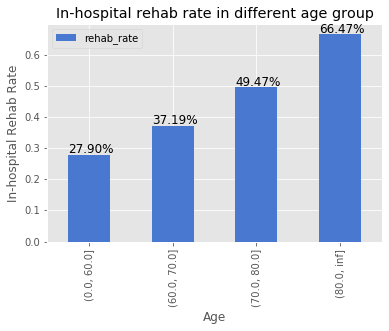

,clmseprtid,rehab_clmseprtid,rehab_rate
mbrage,,,
"(0.0, 60.0]",6637,1852,0.279042
"(60.0, 70.0]",13277,4938,0.371921
"(70.0, 80.0]",11453,5666,0.494718
"(80.0, inf]",4241,2819,0.664702


In [1272]:
AgeRR=df.groupby(age_group).agg({'clmseprtid':'count','rehab_clmseprtid':'count'})
AgeRR['rehab_rate']=(test.rehab_clmseprtid/test.clmseprtid )
AgeRR

AgeRRBar=AgeRR.plot.bar(y='rehab_rate',color='b')
plt.xlabel('Age')
plt.ylabel('In-hospital Rehab Rate')
plt.title('In-hospital rehab rate in different age group')
# Add annotate
for p in AgeRRBar.patches: 
    AgeRRBar.annotate('{:.2%}'.format(p.get_height()), (p.get_x()+p.get_width()/150, p.get_height()+0.005),fontsize=12)
plt.show()
AgeRR


#### Different gender in different group

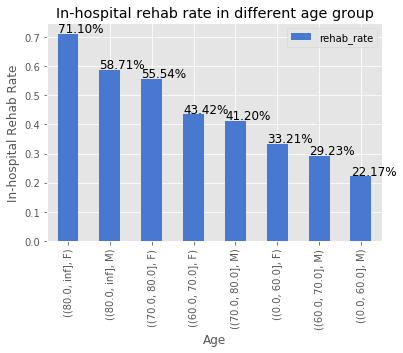

clmseprtid  rehab_clmseprtid  rehab_rate
mbrage       patientgender                                          
(80.0, inf]  F                    2657              1889    0.710952
             M                    1584               930    0.587121
(70.0, 80.0] F                    6606              3669    0.555404
(60.0, 70.0] F                    7451              3235    0.434170
(70.0, 80.0] M                    4847              1997    0.412007
(0.0, 60.0]  F                    3448              1145    0.332077
(60.0, 70.0] M                    5826              1703    0.292310
(0.0, 60.0]  M                    3189               707    0.221700

In [1177]:
agegenderRR=df.groupby([(age_group),'patientgender']).agg({'clmseprtid':'count','rehab_clmseprtid':'count'})
agegenderRR['rehab_rate']=(agegenderRR.rehab_clmseprtid/agegenderRR.clmseprtid )
agegenderRR=agegenderRR.sort_values('rehab_rate',ascending=False)

agegenderRRBar=agegenderRR.plot.bar(y='rehab_rate',color='b')
plt.xlabel('Age')
plt.ylabel('In-hospital Rehab Rate')
plt.title('In-hospital rehab rate in different age group')
# Add annotate
for p in agegenderRRBar.patches: 
    agegenderRRBar.annotate('{:.2%}'.format(p.get_height()), (p.get_x()+p.get_width()/150, p.get_height()+0.005),fontsize=12)
plt.show()

agegenderRR

# age_group = pd.cut(df['mbrage'], bins=[0,60,70,80,np.inf])
# age_gender_group=df.groupby([(age_group),'patientgender']).agg({'totfundhospmedbenefitamt':'mean','clmseprtid':'count'}).sort_values('totfundhospmedbenefitamt',ascending=False)
# age_gender_group

how to make barplot with different age in differnt group? cannot use hue here??

### insights for age factor (✔)
For age, elderly patients were more likely to be admitted to in-hospital rehabilitation.<br>

### 3.location (states)

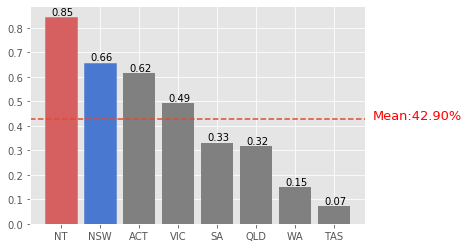

,hospstate,clmseprtid,rehab_clmseprtid,rehab_rate
2,NT,130,110,0.846154
1,NSW,7383,4863,0.658675
0,ACT,815,503,0.617178
6,VIC,11456,5651,0.493279
4,SA,2560,849,0.331641
3,QLD,8483,2690,0.317105
7,WA,3371,508,0.150697
5,TAS,1410,101,0.071631


In [922]:
RRState=RehabRate(factor='hospstate')

x12=RRState.hospstate
y12=RRState.rehab_rate
RRStatebar=plt.bar(x12,y12,color='grey') 
# Add label value
for bar in RRStatebar:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/5, yval, '{:.2f}'.format(yval), va='bottom') #va: vertical alignment y positional argument        

RRStatebar[0].set_color('r')
RRStatebar[1].set_color('b')

# Add average rehab rate line
# Rehab rate across Australia
reratemean=df.rehab_clmseprtid.count()/df.clmseprtid.count()
plt.axhline(reratemean,linestyle='dashed')
plt.text(8, reratemean, 'Mean:{:0.2%}'.format(reratemean), fontsize=13, color='red')

plt.show()
RRState

Why some of the states got higher rehab rate than others? Is the number of rehab hospitals affect this?

##### Distribution of rehab hospital groups & hospitals across Australia

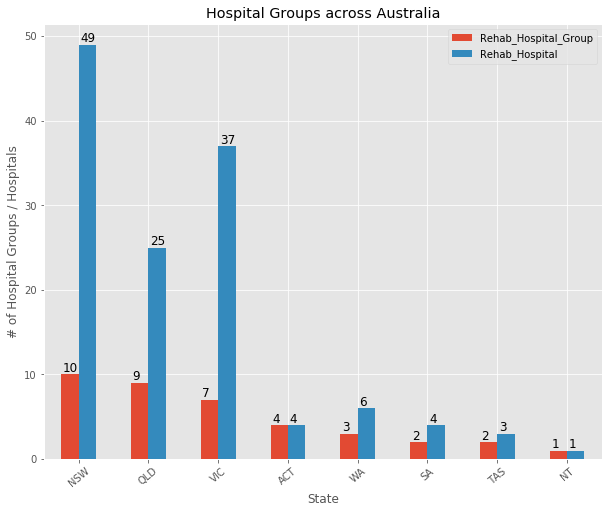

,hospstate,Rehab_Hospital_Group,Rehab_Hospital
1,NSW,10,49
3,QLD,9,25
6,VIC,7,37
0,ACT,4,4
7,WA,3,6
4,SA,2,4
5,TAS,2,3
2,NT,1,1


In [1055]:
#Create new data to get # of states coverd by each rehab hospital group and # of rehab hospitals under each group
rehab_location=df.groupby(['hospstate'],as_index=False).agg({'rehab_hospgrp':'nunique','rehab_prvnbr':'nunique'})
rehab_location=rehab_location.rename(columns={'rehab_hospgrp':'Rehab_Hospital_Group','rehab_prvnbr':'Rehab_Hospital'})
rehab_location=rehab_location.sort_values(['Rehab_Hospital_Group', 'Rehab_Hospital'],ascending=[False,False])

#Plot bar chart

reloBar=rehab_location.plot.bar(x = 'hospstate', y = ['Rehab_Hospital_Group', 'Rehab_Hospital'],rot = 40,figsize=(10,8))

plt.xlabel('State')
plt.ylabel('# of Hospital Groups / Hospitals')
plt.title('Hospital Groups across Australia')
# Add annotate
for p in reloBar.patches: 
    reloBar.annotate(np.round(p.get_height()), (p.get_x()+p.get_width()/10.5, p.get_height()+.3),fontsize=12)
plt.show()
rehab_location

Above table showing rehab hospital groups and rehab hospitals availability in each state.
There is only 1 rehab hospital in NT, but it contributes the highest rehab rate. ACT got similar situation.
Therefore, rehabilitation service availability had limited impact on in-hospital rehabilitation.

### ### insights for location factor (✔)

###### In each state, will the number of rehab hospital groups / rehab hospitals affect the rehab rate?
<br>
From analysis above, we noticed:<br>
* Although there's only 1 rehab hospital group and 1 rehab hospital in NT, it has the highest rehab rate. <br>
* Another state should be highlighted is ACT, the rehabe rate is comparative high (61.71%) although there are only 4 rehab hospital groups and 4 rehab hospitals in that state.<br>
* On the other side, with 9 rehab hospital groups and 25 rehab hospitals, the rehab rate for QLD is relatively low comparing to NSW and VIC.
<br>
<br>
Conclusion:<br>
* Number of rehab hospital groups / rehab hospitals is not a crucial factor that affect the rehab rate<br>
* Average cost in different states varied as well. Should consider to charge higher premium for customers from VIC, TAS and WA.


### 4.HAC flag


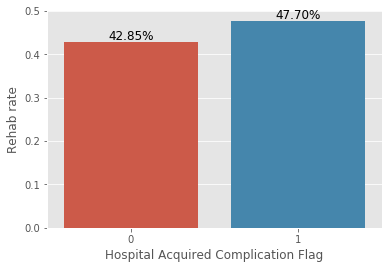

,hacofadj1_flg,clmseprtid,rehab_clmseprtid,rehab_rate
1,1,369,176,0.476965
0,0,35239,15099,0.428474


In [1056]:
RRHACs=RehabRate(factor='hacofadj1_flg')

RRHACsBar=sns.barplot(x='hacofadj1_flg',y='rehab_rate',data=RRHACs) 
plt.xlabel('Hospital Acquired Complication Flag')
plt.ylabel('Rehab rate')
#Add label value
for p in RRHACsBar.patches: 
    RRHACsBar.annotate('{:.2%}'.format(p.get_height()), (p.get_x()+p.get_width()/3, p.get_height()+0.005),fontsize=12)
plt.show()
RRHACs

### insights for HAC flag factor (✗)
Based on this dataset, the rehab rate of the patients who flagged with hospital-acuqired complication is similar to the patients without the flag. Therefore, this is not a key factor.

### 5.procedure group

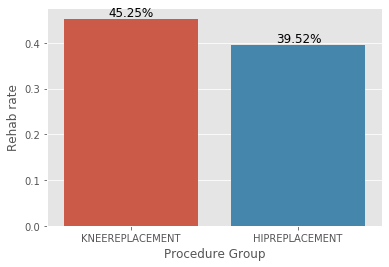

,specialty_grp,clmseprtid,rehab_clmseprtid,rehab_rate
1,KNEEREPLACEMENT,21004,9504,0.452485
0,HIPREPLACEMENT,14604,5771,0.395166


In [1058]:
progrpRR=RehabRate(factor='specialty_grp')

progrpRRBar=sns.barplot(x='specialty_grp',y='rehab_rate',data=progrpRR) 
plt.xlabel('Procedure Group')
plt.ylabel('Rehab rate')
#Add label value
for p in progrpRRBar.patches: 
    progrpRRBar.annotate('{:.2%}'.format(p.get_height()), (p.get_x()+p.get_width()/3, p.get_height()+0.005),fontsize=12)
plt.show()
progrpRR

### insights for procedure group factor (✔):
Patients who did knee replacement have higher likelihood of choosing in-hospital rehabilitation.<br>
Let's look more detail of the DRG.

### 6.DRG

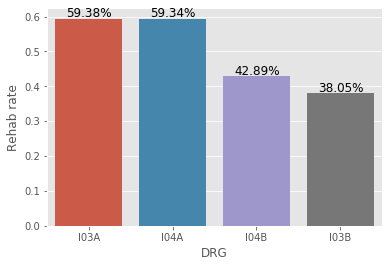

,drggrpv6x,clmseprtid,rehab_clmseprtid,rehab_rate
0,I03A,1002,595,0.593812
2,I04A,3010,1786,0.593355
3,I04B,17994,7718,0.428921
1,I03B,13602,5176,0.380532


In [1065]:
DRGRR=RehabRate(factor='drggrpv6x')

DRGRRBar=sns.barplot(x='drggrpv6x',y='rehab_rate',data=DRGRR) 
plt.xlabel('DRG')
plt.ylabel('Rehab rate')
#Add label value
for p in DRGRRBar.patches: 
    DRGRRBar.annotate('{:.2%}'.format(p.get_height()), (p.get_x()+p.get_width()/6, p.get_height()+0.005),fontsize=12)
plt.show()
DRGRR

### insights for DRG factor (✔)
* For both hip and knee replacement,in-hospital rehab rate is higher if the DRG end with split indicator A.

### 7.patient complexity

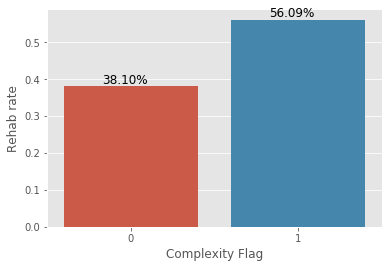

,flg_complex,clmseprtid,rehab_clmseprtid,rehab_rate
1,1,9492,5324,0.560893
0,0,26116,9951,0.381031


In [1074]:
PatComRR=RehabRate(factor='flg_complex')

PatComRRBar=sns.barplot(x='flg_complex',y='rehab_rate',data=PatComRR) 
plt.xlabel('Complexity Flag')
plt.ylabel('Rehab rate')
#Add label value
for p in PatComRRBar.patches: 
    PatComRRBar.annotate('{:.2%}'.format(p.get_height()), (p.get_x()+p.get_width()/3.5, p.get_height()+0.008),fontsize=12)
plt.show()
PatComRR

### insights for patient complexity factor (✔)
Patients flagged with complexity flag has much higher in-hospital rehab rate.

### Charge for rehabilitation
* create new data: <br>
to get average rehab charge by each rehab hospital group<br>
* plot bar charts 

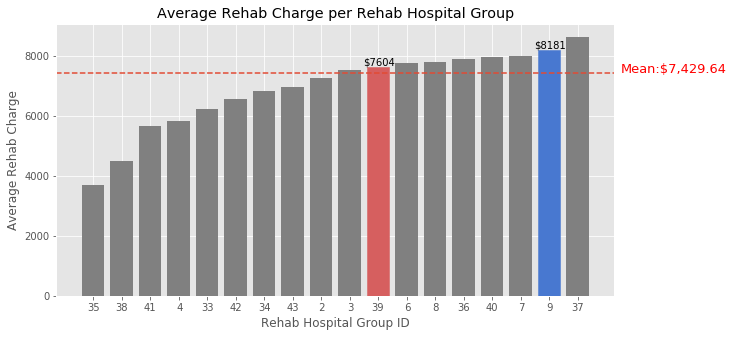

Average rehab charge is $7,429.64 .


,rehab_hospgrp,rehab_HospExProsBen,GroupID
4,Hospital Group 35,3698.062500,35
7,Hospital Group 38,4488.848485,38
11,Hospital Group 41,5659.490308,41
9,Hospital Group 4,5823.064644,4
2,Hospital Group 33,6222.652893,33
12,Hospital Group 42,6557.294118,42
3,Hospital Group 34,6826.860976,34
13,Hospital Group 43,6956.925469,43
0,Hospital Group 2,7237.750000,2
1,Hospital Group 3,7516.805353,3


In [1187]:
#Create new data to get average price charged for rehabiliation by each rehab hospital group
rehab_charge=df.groupby(['rehab_hospgrp'],as_index=False).agg({'rehab_HospExProsBen':'mean'}).sort_values(['rehab_HospExProsBen'],ascending=True)

#Rename the hospital group name --> shorten the names
rehab_charge['GroupID']=rehab_charge.rehab_hospgrp.str[-2:]
#Create new data to get average price charged for rehabiliation by each rehab hospital group
rehab_charge=df.groupby(['rehab_hospgrp'],as_index=False).agg({'rehab_HospExProsBen':'mean'}).sort_values(['rehab_HospExProsBen'],ascending=True)

#Rename the hospital group name --> shorten the names
rehab_charge['GroupID']=rehab_charge.rehab_hospgrp.str[-2:]

#plot bar chart
#Define x and y-axies and figure size
x5=rehab_charge.GroupID
y5=rehab_charge.rehab_HospExProsBen

fig=plt.figure(figsize=(10,5))

#Plot bar chart
RehabChgBar=plt.bar(x5,y5,color='grey')

#Add value label on the top of group 39 and 9
for idx, bar in enumerate(RehabChgBar):
    yval = bar.get_height()
    if idx == 10 or idx == 16:
        plt.text(bar.get_x() + bar.get_width()/10 - 0.2, yval, '$' + str(int(yval)), va='bottom') #va: vertical alignment y positional argument

#Highlight group 39 and 9
RehabChgBar[10].set_color('r')
RehabChgBar[16].set_color('b')

#Add x,y labels and title
plt.xlabel('Rehab Hospital Group ID')
plt.ylabel('Average Rehab Charge')
plt.title('Average Rehab Charge per Rehab Hospital Group')

#Add average line
RCmean=df.rehab_HospExProsBen.mean()
plt.axhline(RCmean,linestyle='dashed')
plt.text(18.5, RCmean, 'Mean:${:0,.2f}'.format(RCmean), fontsize=13, color='red')

plt.show()

print('Average rehab charge is','${:,.2f}'.format(RCmean),'.')
rehab_charge


### insights for charge for rehabilitation (✔)

* Hospital group 35 charges lowest cost for rehabilitation, however our decision is between group 39 and 9.
* Average charge for rehabilitation of group 39 (\\$7,604) while is lower than group 9 (\\$8,181).<br>
<br>
*Hospital Group 39

### Rehab results：fim score improvement
* create new data: <br>
1.get average total admission fim scores for each rehab hospital group <br>
2.get average total discharge fim scores for each rehab hospital group <br>
3.calculate rehab results based on the difference between 1 & 2<br>
* plot bar charts for rehab results

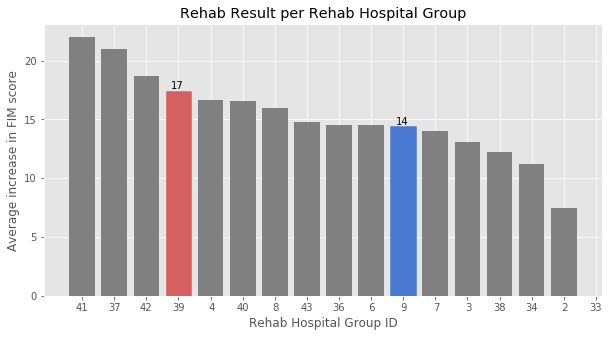

,rehab_hospgrp,totdischargefim,totadmitfim,fimchange,GroupID
11,Hospital Group 41,114.582656,92.571816,22.010840,41
6,Hospital Group 37,107.000000,86.000000,21.000000,37
12,Hospital Group 42,113.928839,95.243446,18.685393,42
8,Hospital Group 39,112.850868,95.402792,17.448076,39
9,Hospital Group 4,111.826446,95.157025,16.669421,4
10,Hospital Group 40,115.576737,98.978998,16.597738,40
16,Hospital Group 8,115.333957,99.356408,15.977549,8
13,Hospital Group 43,113.017921,98.229391,14.788530,43
5,Hospital Group 36,113.037037,98.481481,14.555556,36
14,Hospital Group 6,115.168007,100.616622,14.551385,6


In [1188]:
#Create new data to get average fim score (admission & discharge) for each rehab hospital group
rehab_results=df.groupby(['rehab_hospgrp'],as_index=False).agg({'totdischargefim':'mean','totadmitfim':'mean'})

#calculate the difference of average fim score between admission and discharge for each rehab hospital group
rehab_results['fimchange']=(rehab_results.totdischargefim-rehab_results.totadmitfim)
# .sort_values(['hospstate'],ascending=False)

#Rename the hospital group name --> shorten the names
rehab_results['GroupID']=rehab_results.rehab_hospgrp.str[-2:]

rehab_results=rehab_results.sort_values(['fimchange'],ascending=False)

#plot bar chart
#Define x and y-axies and figure size
x3=rehab_results.GroupID
y3=rehab_results.fimchange
fig=plt.figure(figsize=(10,5))

#Plot bar chart
RehabReBar=plt.bar(x3,y3,color='grey')
RehabReBar[3].set_color('r')
RehabReBar[10].set_color('b')


#Add x,y labels and title
plt.xlabel('Rehab Hospital Group ID')
plt.ylabel('Average increase in FIM score')
plt.title('Rehab Result per Rehab Hospital Group')


#Add value label on the top of group 39 and 9
for idx, bar in enumerate(RehabReBar):
    yval = bar.get_height()
    if idx == 3 or idx == 10:
        plt.text(bar.get_x() + bar.get_width()/5, yval, int(yval), va='bottom') #va: vertical alignment y positional argument
      
        
        
plt.show()

rehab_results

In [1344]:
refimrecord=df.groupby('rehab_hospgrp',as_index=False).agg({'totmotordischargefim':'count','clmseprtid':'count'})
refimrecordrate=refimrecord.totmotordischargefim.sum()/refimrecord.clmseprtid.sum()
print('{:,.2%}'.format(refimrecordrate),'of patients got the fim scores record')

63.59% of patients got the fim scores record


### insights for rehab result (✔)

* Hospital group 41 is the best rehab provider, however our decision is between group 39 and 9.
* We can see from the plot group 39 provides better rehab results than group 9.
* The fim change are 17.45 and 14.4 in average respectively
* Almost 64% of patients recorded their fim scores, this evidence is moderate. And we need to encourage hospitals to keep records of patients' fim scores.<br>
<br>
*Hospital Group 39


### Length of rehab days  
* create new data: <br>
to get average rehab length of stays for each rehab hospital group<br>
* plot bar charts 

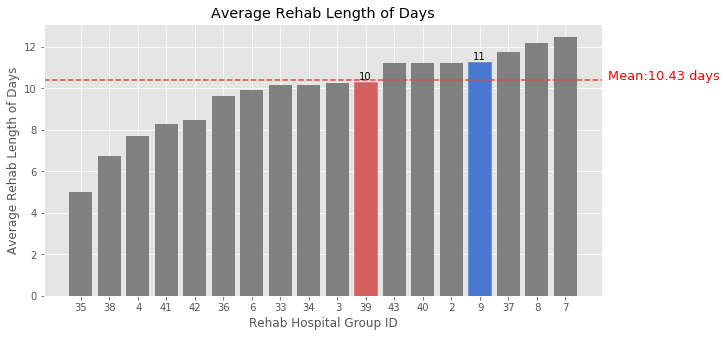

Average length of rehab is 10.43 days.


,rehab_hospgrp,rehab_ClmLOSDays,GroupID
4,Hospital Group 35,5.000000,35
7,Hospital Group 38,6.757576,38
9,Hospital Group 4,7.715040,4
11,Hospital Group 41,8.296465,41
12,Hospital Group 42,8.488844,42
5,Hospital Group 36,9.623596,36
14,Hospital Group 6,9.918841,6
2,Hospital Group 33,10.144628,33
3,Hospital Group 34,10.175166,34
1,Hospital Group 3,10.270073,3


In [647]:
#Create new data to get average rehab length of stays for each rehab hospital group
rehab_len=df.groupby(['rehab_hospgrp'],as_index=False).agg({'rehab_ClmLOSDays':'mean'}).sort_values(['rehab_ClmLOSDays'],ascending=True)

#Rename the hospital group name --> shorten the names
rehab_len['GroupID']=rehab_len.rehab_hospgrp.str[-2:]



#plot bar chart
#Define x and y-axies and figure size
x4=rehab_len.GroupID
y4=rehab_len.rehab_ClmLOSDays

fig=plt.figure(figsize=(10,5))

#Plot bar chart
RehabDayBar=plt.bar(x4,y4,color='grey')

#Add value label on the top of group 39 and 9
for idx, bar in enumerate(RehabDayBar):
    yval = bar.get_height()
    if idx == 10 or idx == 14:
        plt.text(bar.get_x() + bar.get_width()/5, yval, int(yval), va='bottom') #va: vertical alignment y positional argument

#Highlight group 39 and 9
RehabDayBar[10].set_color('r')
RehabDayBar[14].set_color('b')

#Add average line
RDmean=df.rehab_ClmLOSDays.mean()
plt.axhline(RDmean,linestyle='dashed')

#Add x,y labels and title
plt.xlabel('Rehab Hospital Group ID')
plt.ylabel('Average Rehab Length of Days')
plt.title('Average Rehab Length of Days')
plt.text(18.5, RDmean, 'Mean:{:0.2f}'.format(RDmean)+' days', fontsize=13, color='red')

plt.show()

print('Average length of rehab is','{:,.2f}'.format(RDmean),'days.')
rehab_len

### insights for average rehab days :
Average days for rehabilitation:
* Rehab hospital group 39: 10.3 days (better)
* Rehab hospital group 9: 11.3 days<br>
<br>
*Hospital Group 39

## End of part 2

## Part3 Factors may affect patients:
* expense out of pocket
* waiting time for rehabiliation

### expense out of pocket
* create new data: <br>
to get average expense out of pocket by each hospital group<br>
* plot bar charts 

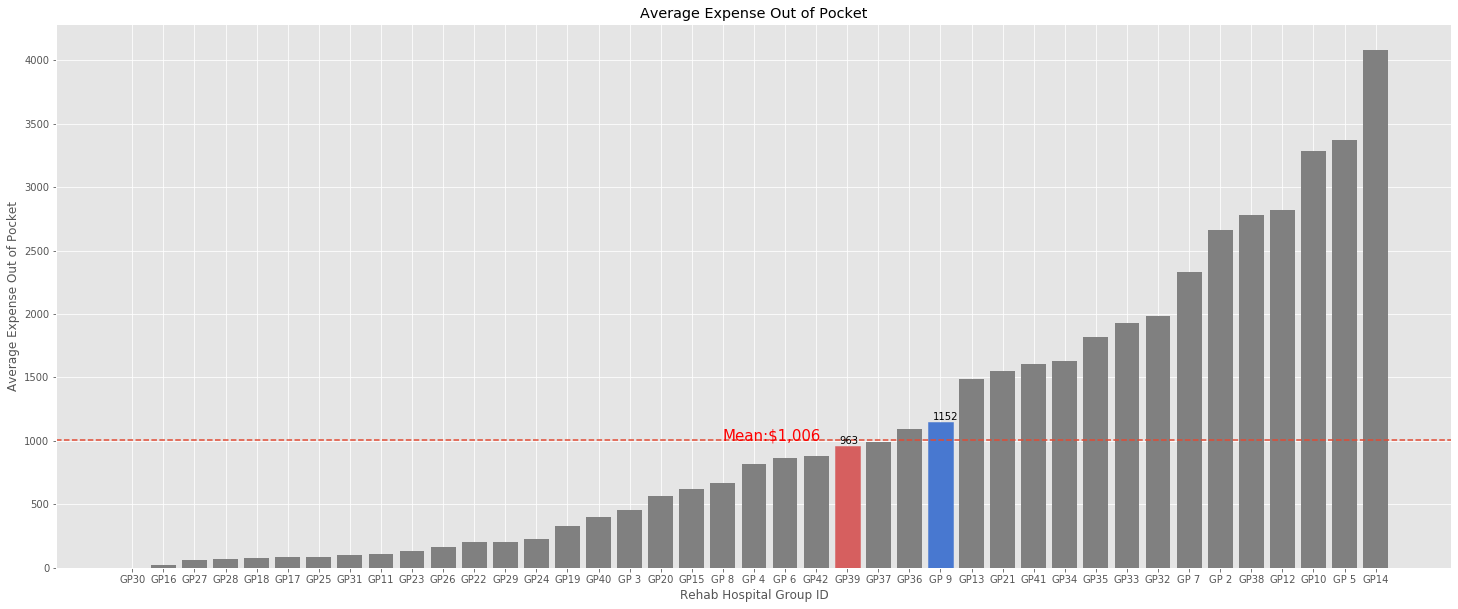

Average expense out of pocket is: $1,006 .


,hospgrp,Expense_out_of_pocket,GroupID
31,Hospital Group 39,963.692196,GP39
40,Hospital Group 9,1152.079459,GP 9


In [1361]:
#Create new data to get average expense patients need to pay for each hospital group
ExpOutPocket=df.groupby('hospgrp',as_index=False).agg({'medicoutofpktamt':'mean'}).rename(columns={'medicoutofpktamt':'Expense_out_of_pocket'})

# Rename the hospital group name --> shorten the names
ExpOutPocket['GroupID']='GP'+ExpOutPocket.hospgrp.str[-2:]
ExpOutPocket=ExpOutPocket.sort_values('Expense_out_of_pocket',ascending=True)

#plot bar chart
#Define x and y-axies and figure size
x14=ExpOutPocket.GroupID
y14=ExpOutPocket.Expense_out_of_pocket

fig=plt.figure(figsize=(25,10))

#Plot bar chart
ExpOutPocketBar=plt.bar(x14,y14,color='grey')

#Add value label on the top of group 39 and 9
for idx, bar in enumerate(ExpOutPocketBar):
    yval = bar.get_height()
    if idx == 23 or idx == 26:
        plt.text(bar.get_x() + bar.get_width()/5, yval, int(yval), va='bottom') #va: vertical alignment y positional argument

#Highlight group 39 and 9
ExpOutPocketBar[23].set_color('r')
ExpOutPocketBar[26].set_color('b')

#Add average line
OOPocketmean=df.medicoutofpktamt.mean()
plt.axhline(OOPocketmean,linestyle='dashed')

#Add x,y labels and title
plt.xlabel('Rehab Hospital Group ID')
plt.ylabel('Average Expense Out of Pocket')
plt.title('Average Expense Out of Pocket')
plt.text(19, OOPocketmean, 'Mean:${:0,.0f}'.format(OOPocketmean), fontsize=15, color='red')

plt.show()

print('Average expense out of pocket is:','${:,.0f}'.format(OOPocketmean),'.')

# Only showing average expense paid out of pocket by patients of hospital group 39 & 9
ExpOutPocketGP39=ExpOutPocket[ExpOutPocket.GroupID=='GP39']
ExpOutPocketGP9=ExpOutPocket[ExpOutPocket.GroupID=='GP 9']

#Merge the result
OutOfPocketResult=ExpOutPocketGP39.append(ExpOutPocketGP9)
OutOfPocketResult

### insights for expense out of pocket :
Average out of pocket expense:
* Rehab hospital group 39: \\$963 (better) and lower than average expense of whole dataset \\$1,006
* Rehab hospital group 9: \\$1,152 days<br>
<br>
*Hospital Group 39

### Waiting days for rehab
* create new data: <br>
to get average days between  in-patient discharge and rehab admission by each rehab hospital group<br>
* plot bar charts 

In [ ]:
#Create new data to get average waiting days for rehabiliation from discharge by each group
rehab_waiting=df.groupby(['rehab_hospgrp'],as_index=False).agg({'rehab_days2readmit':'mean'}).sort_values(['rehab_days2readmit'],ascending=True)

#Rename the hospital group name --> shorten the names
rehab_waiting['GroupID']=rehab_waiting.rehab_hospgrp.str[-2:]

#plot bar chart
#Define x and y-axies and figure size
x5=rehab_charge.GroupID
y5=rehab_charge.rehab_HospExProsBen

fig=plt.figure(figsize=(10,5))

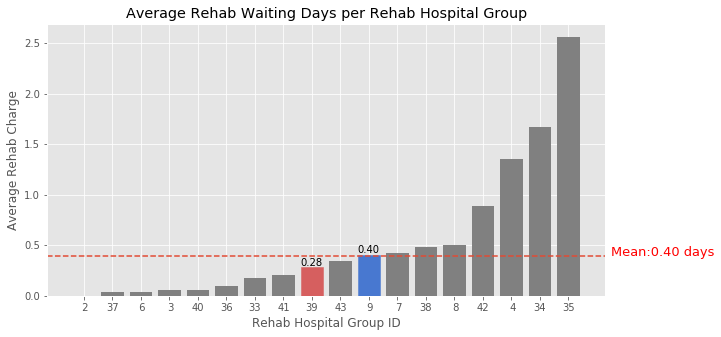

Average waiting days for rehabiliation from discharge is 0.40 days.


,rehab_hospgrp,rehab_days2readmit,GroupID
0,Hospital Group 2,0.000000,2
6,Hospital Group 37,0.033333,37
14,Hospital Group 6,0.037681,6
1,Hospital Group 3,0.058394,3
10,Hospital Group 40,0.059394,40
5,Hospital Group 36,0.101124,36
2,Hospital Group 33,0.177686,33
11,Hospital Group 41,0.208666,41
8,Hospital Group 39,0.280825,39
13,Hospital Group 43,0.346496,43


In [653]:
#Create new data to get average waiting days for rehabiliation from discharge by each group
rehab_waiting=df.groupby(['rehab_hospgrp'],as_index=False).agg({'rehab_days2readmit':'mean'}).sort_values(['rehab_days2readmit'],ascending=True)

#Rename the hospital group name --> shorten the names
rehab_waiting['GroupID']=rehab_waiting.rehab_hospgrp.str[-2:]

#plot bar chart
#Define x and y-axies and figure size
x6=rehab_waiting.GroupID
y6=rehab_waiting.rehab_days2readmit

fig=plt.figure(figsize=(10,5))

#Plot bar chart
RWBar=plt.bar(x6,y6,color='grey')

#Add value label on the top of group 39 and 9
for idx, bar in enumerate(RWBar):
    yval = bar.get_height()
    if idx == 8 or idx == 10:
        plt.text(bar.get_x() + bar.get_width()/10 - 0.1, yval, '{:.2f}'.format(yval), va='bottom') #va: vertical alignment y positional argument

#Highlight group 39 and 9
RWBar[8].set_color('r')
RWBar[10].set_color('b')

#Add x,y labels and title
plt.xlabel('Rehab Hospital Group ID')
plt.ylabel('Average Rehab Charge')
plt.title('Average Rehab Waiting Days per Rehab Hospital Group')

#Add average line
RWmean=df.rehab_days2readmit.mean()
plt.axhline(RWmean,linestyle='dashed')
plt.text(18.5, RWmean, 'Mean:{:0.2f}'.format(RWmean)+' days', fontsize=13, color='red')

plt.show()
print('Average waiting days for rehabiliation from discharge is','{:,.2f}'.format(RWmean),'days.')
rehab_waiting

### Waiting days for rehab insights:
* Hospital group 9 kept patients slightly longer for waiting from discharge to rehabiliation.
* Average waiting days are 0.28(group 39) and 0.4(group 9)

## End of EDA

## Summary:
* In the first part of this project, I digged out several factors that will affect total benefit payable.<br>
* One effective way to help the company to get better financial performance in the future is to choose an outstanding hospital group to collaborate with.<br>
* Based on above analysis, strong evidences showing that hospital group 39 is the most appropriate one for the final decision.<br>

### Possible ways and benefits in regards of collaboration:
1. Include hospital group 39 in Memebers' Choice Hospitals if possilbe

possible benefits for company:<br>
* Lower total benefit payable can deliver saving to company<br>
* A wider range of hospitals for customers<br>

possible benefits for customers:<br>
* Generally lower out-of-pockets than non-Members' Choice providers<br>
* A wider range of extras services than other insurers<br>

2. Include hospital group 39 in Health Assist programs which offer specialised support delivered through telehealth and in-home care

possible benefit for company:<br>
* Lower total benefit payable as we can lower inpatient rehab rate and length of stay through these programs<br>

possible benefits for customers:<br>
* Lower length of stay,lower out-of-pockets<br>
* Extras professional services after discharge<br>